github link: https://github.com/augustthedoodle/ecen610

LAB 5
Data Conversion Basics

1. A 200mV rms value sinusoidal signal is applied to and ideal 12 bits ADC. The full range peak-to-peak voltage of the ADC is 1.2V.
a. Find the SNR of the ADC output.

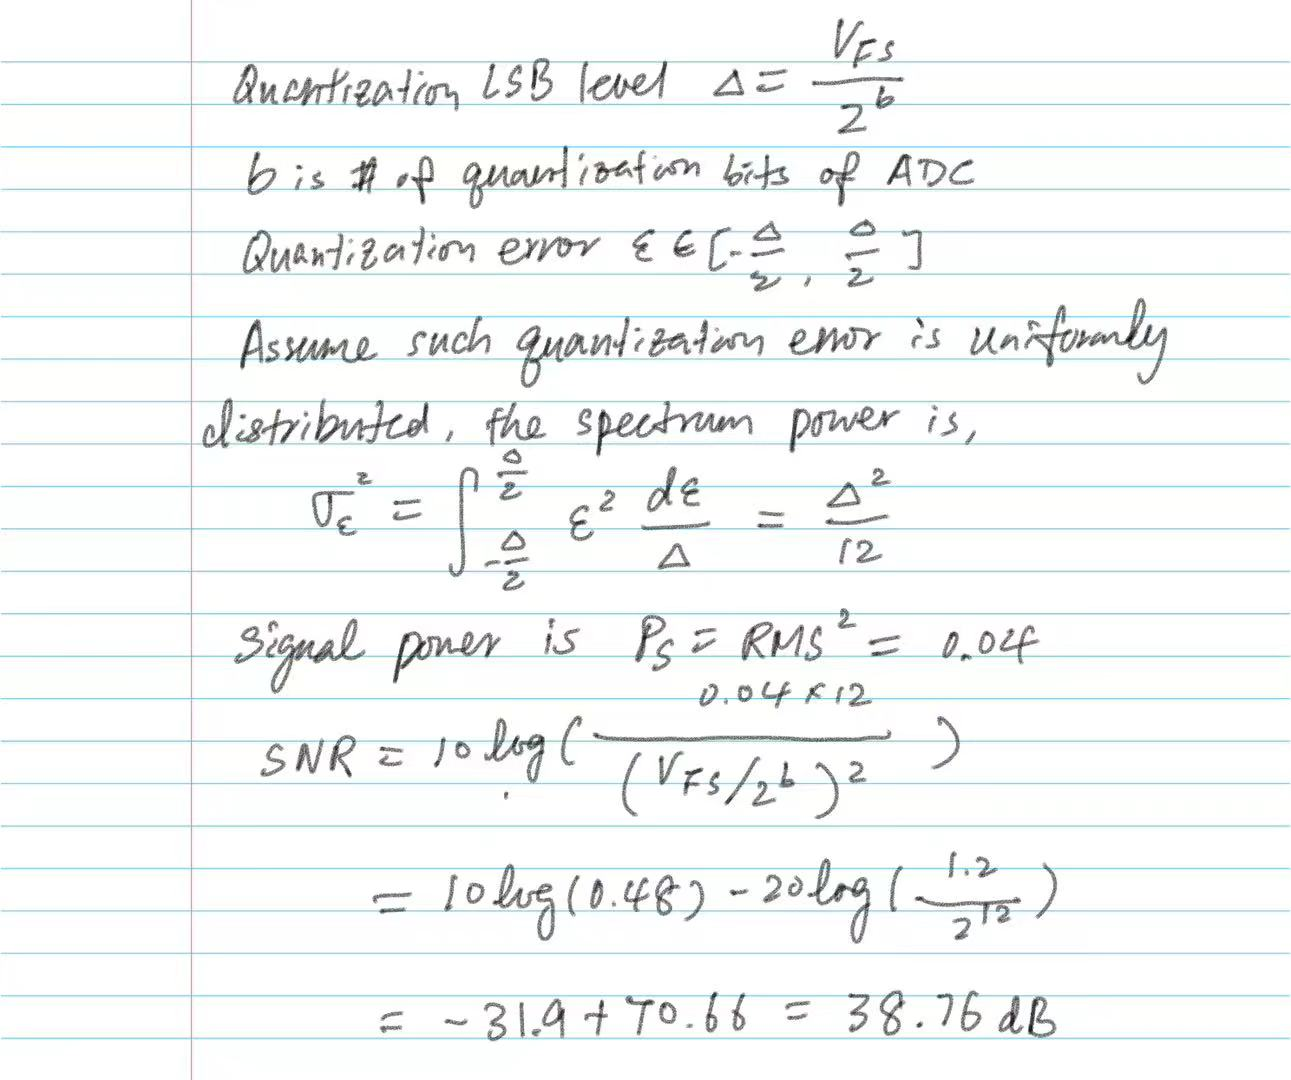

b. Now the input sinusoidal is full range but comes with an additive Gaussian noise
with standard deviation of 0.5 V. What is the SNR of the input signal? What is the
SNR of the ADC output bits?

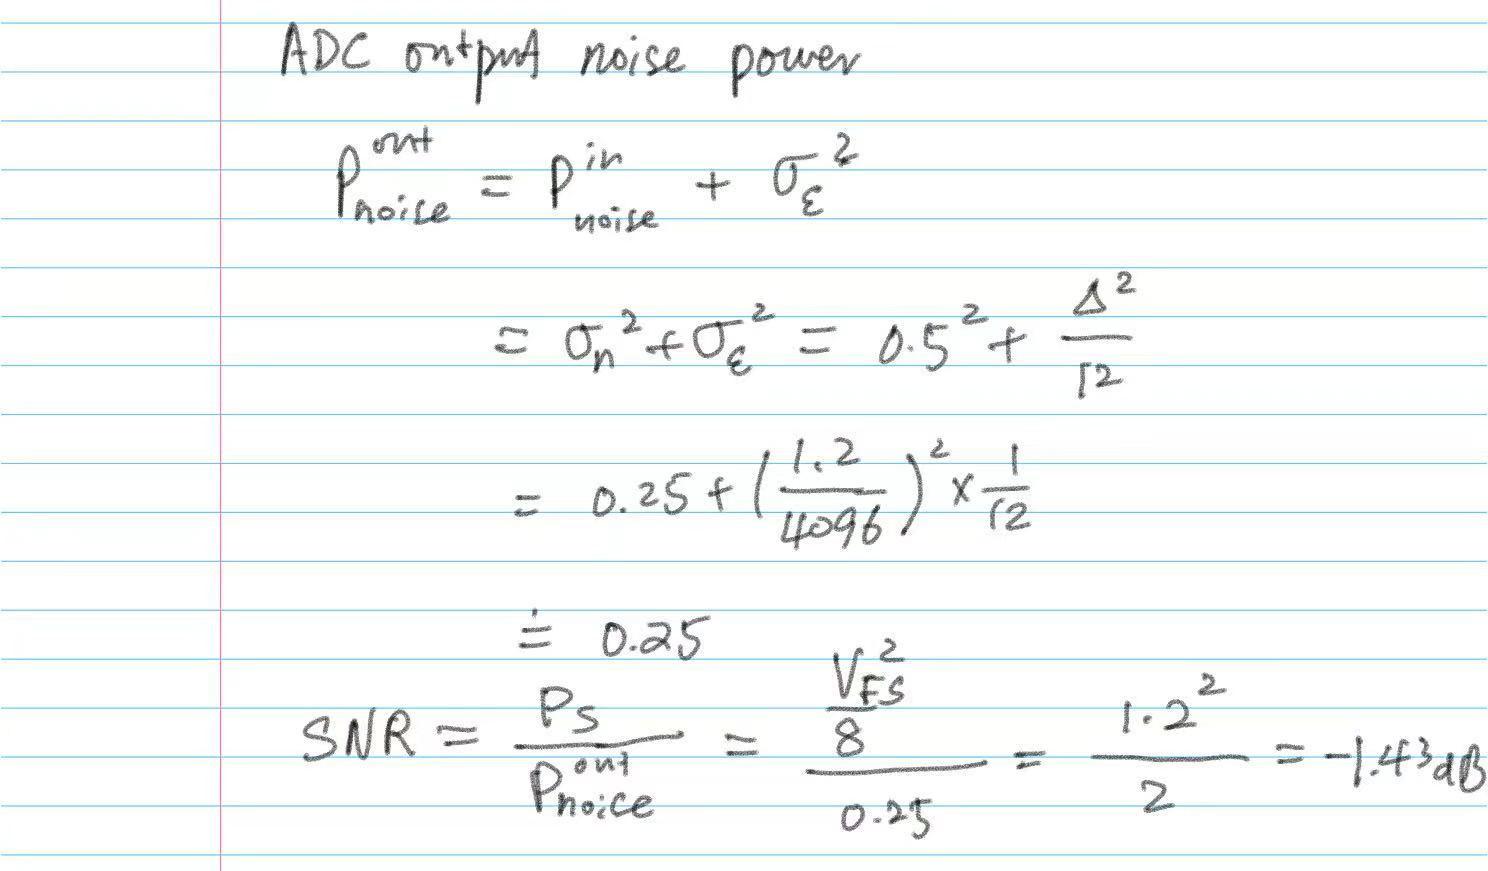


c. Repeat b assuming that the noise added to the sinewave is uniformly distributed
with peak-to-peak value of 1V.

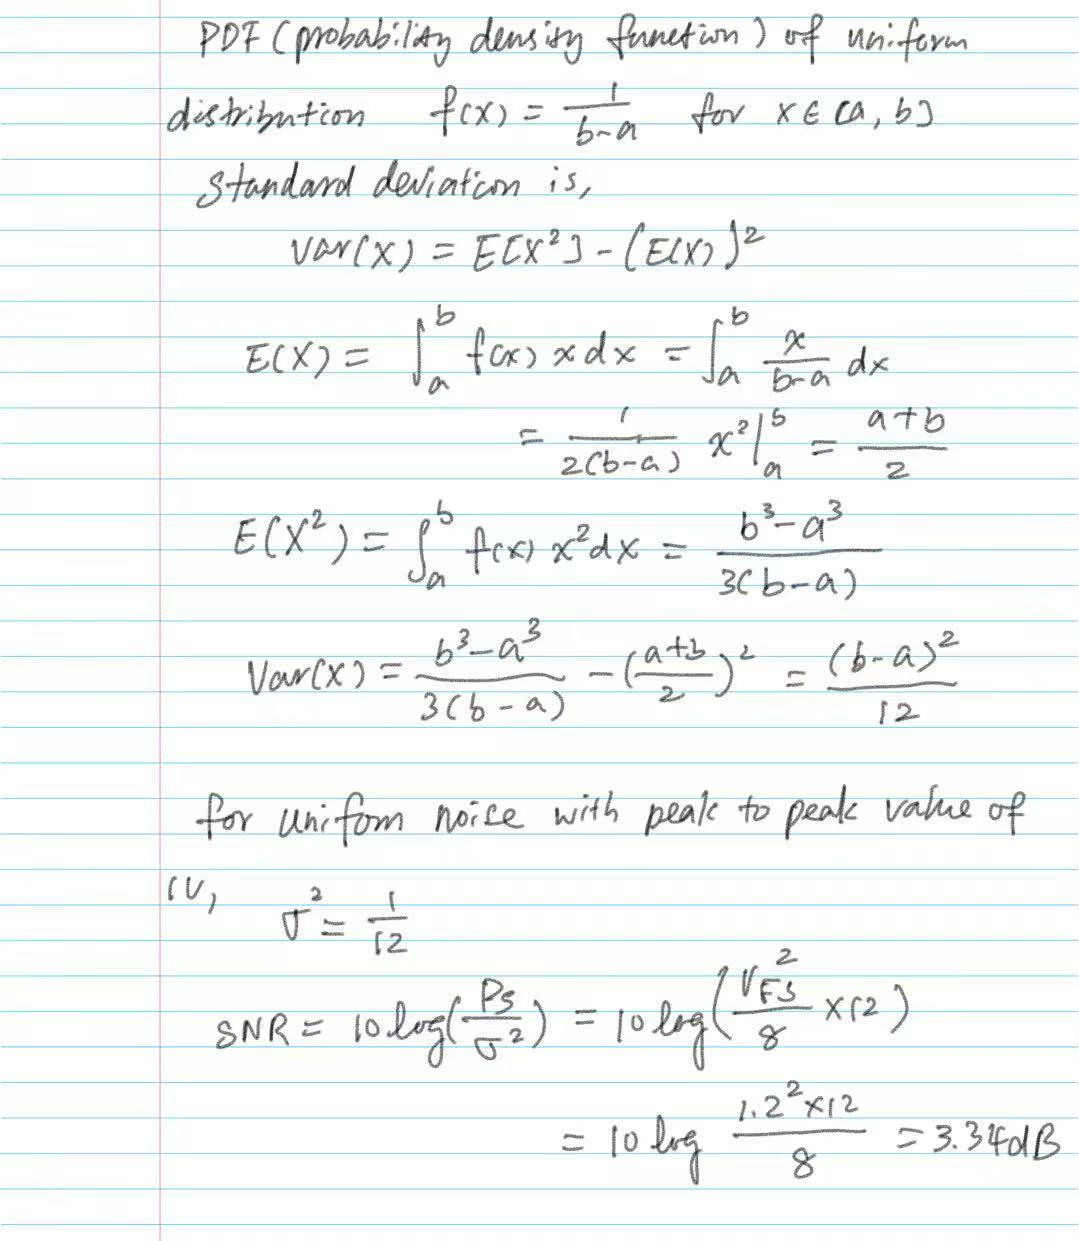

2. Assume that an ADC uses an oversampling factor K=fs/(2B), where fs is the sampling
rate and B is the signal bandwidth. Then K=1 is Nyquist rate and K>1 means
oversamplig. The quantization noise variance is σe=Δ²/12 as we defined in class for the
additive noise model. As you may recall also, this noise is uniformly distributed and
white, i.e. is flat in the frequency range [0 fs/2]. Then the noise power spectral density
will be σe/fs, so the integral in the range [-fs/2 fs/2] is σe. Now assume that a perfect
low-pass filter is used that selects the signal bandwidth B and rejects all the out of band
noise. Find an expression for the output SNR of this oversampled ADC+low-pass filter
combination.

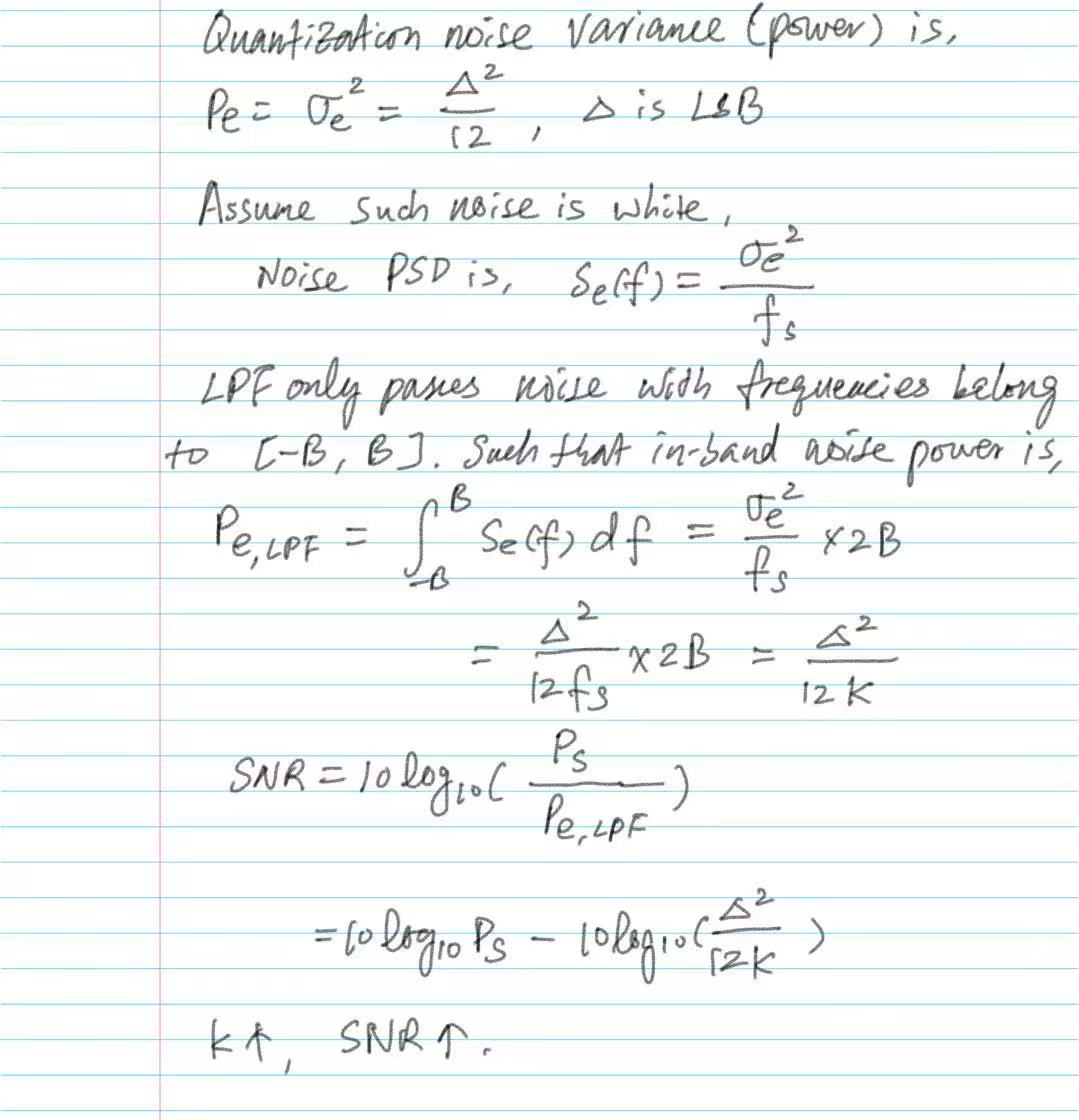

3. A 3-bit D/A converter were designed for an ideal LSB level of 100 mV. The following
output voltages levels were measured for the real D/A for thee codes 000 to 111
respectively: -0.01V 0.105V 0.195V 0.28V 0.37V 0.48V 0.6V 0.75V
a. Find the offset & full-scale error in units of LSBs
b. Find the end-point ideal & actual gain in LSB/code and compute the gain error in
LSB/code
c. Find the end point corrected codes and compute DNL & INL for all the codes.
d. What is the maximum DNL and INL?
Hint: I suggest you take a look at the following article in case of you have questions for
this problem:
http://focus.ti.com/lit/an/slaa013/slaa013.pdf#search=%22understanding%20data%20con
verters%20%

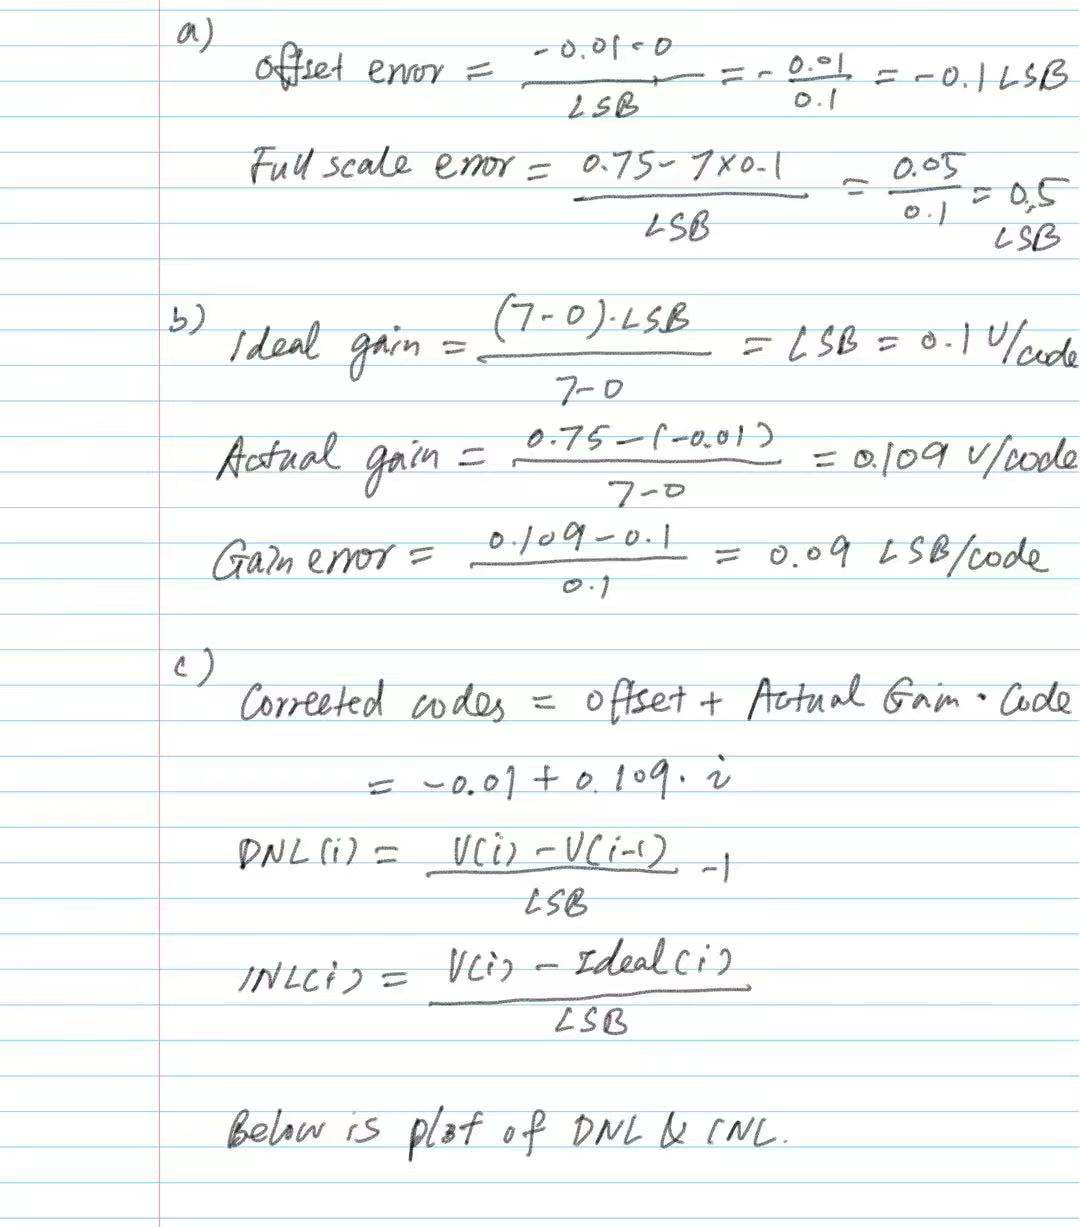
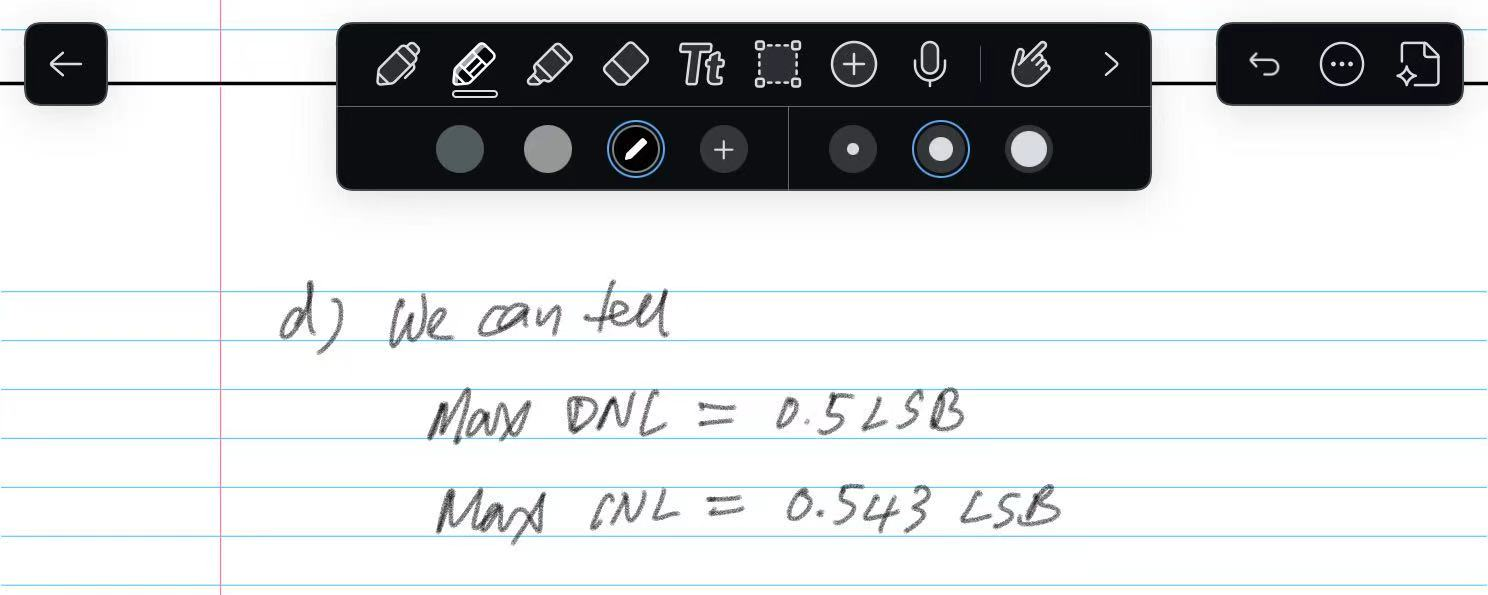
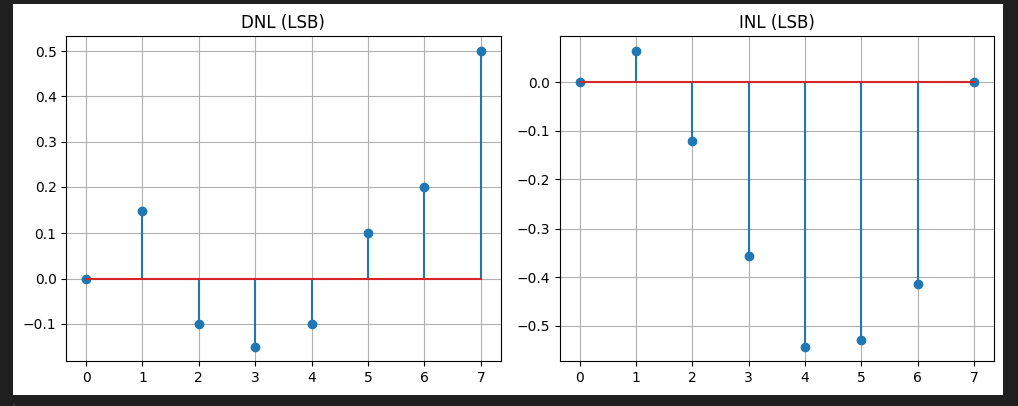


Max DNL (LSB): 0.5000000000000002
Max INL (LSB): 0.5428571428571427


/tmp/ipykernel_14359/217724823.py:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(dnl, use_line_collection=True)
/tmp/ipykernel_14359/217724823.py:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(inl, use_line_collection=True)


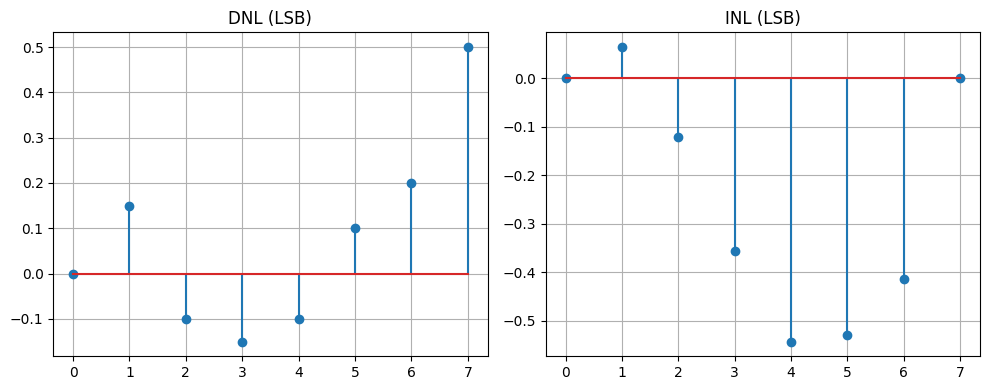

In [5]:
import numpy as np
import matplotlib.pyplot as plt

measured = np.array([-0.01, 0.105, 0.195, 0.28, 0.37, 0.48, 0.6, 0.75])
ideal_lsb = 0.1

actual_gain = (measured[-1] - measured[0]) / 7
offset = measured[0]

# Corrected code
ideal = offset + np.arange(8) * actual_gain

dnl = np.diff(measured) / ideal_lsb - 1
dnl = np.insert(dnl, 0, 0)

inl = (measured - ideal) / ideal_lsb

print("Max DNL (LSB):", np.max(np.abs(dnl)))
print("Max INL (LSB):", np.max(np.abs(inl)))

# Plotting
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(dnl, use_line_collection=True)
plt.title("DNL (LSB)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(inl, use_line_collection=True)
plt.title("INL (LSB)")
plt.grid(True)
plt.tight_layout()
plt.show()


4. A ramp histogram is used to characterize a 4-bit ADC, the following vector is found:
43 115 85 101 122 170 75 146 125 60 95 95 115 40 120 242
I suggest you do this in Matlab:
a.) Calculate the DNL and INL
b.) What are the peak DNL and INL values?
c.) Is this ADC monotonic?
Hint: Recall that you use as a reference the straight line that connects the end points of
the transfer function provided by the histogram. This is needed to eliminate offset errors
and full scale errors. There is a trivial way to eliminate these errors. How?

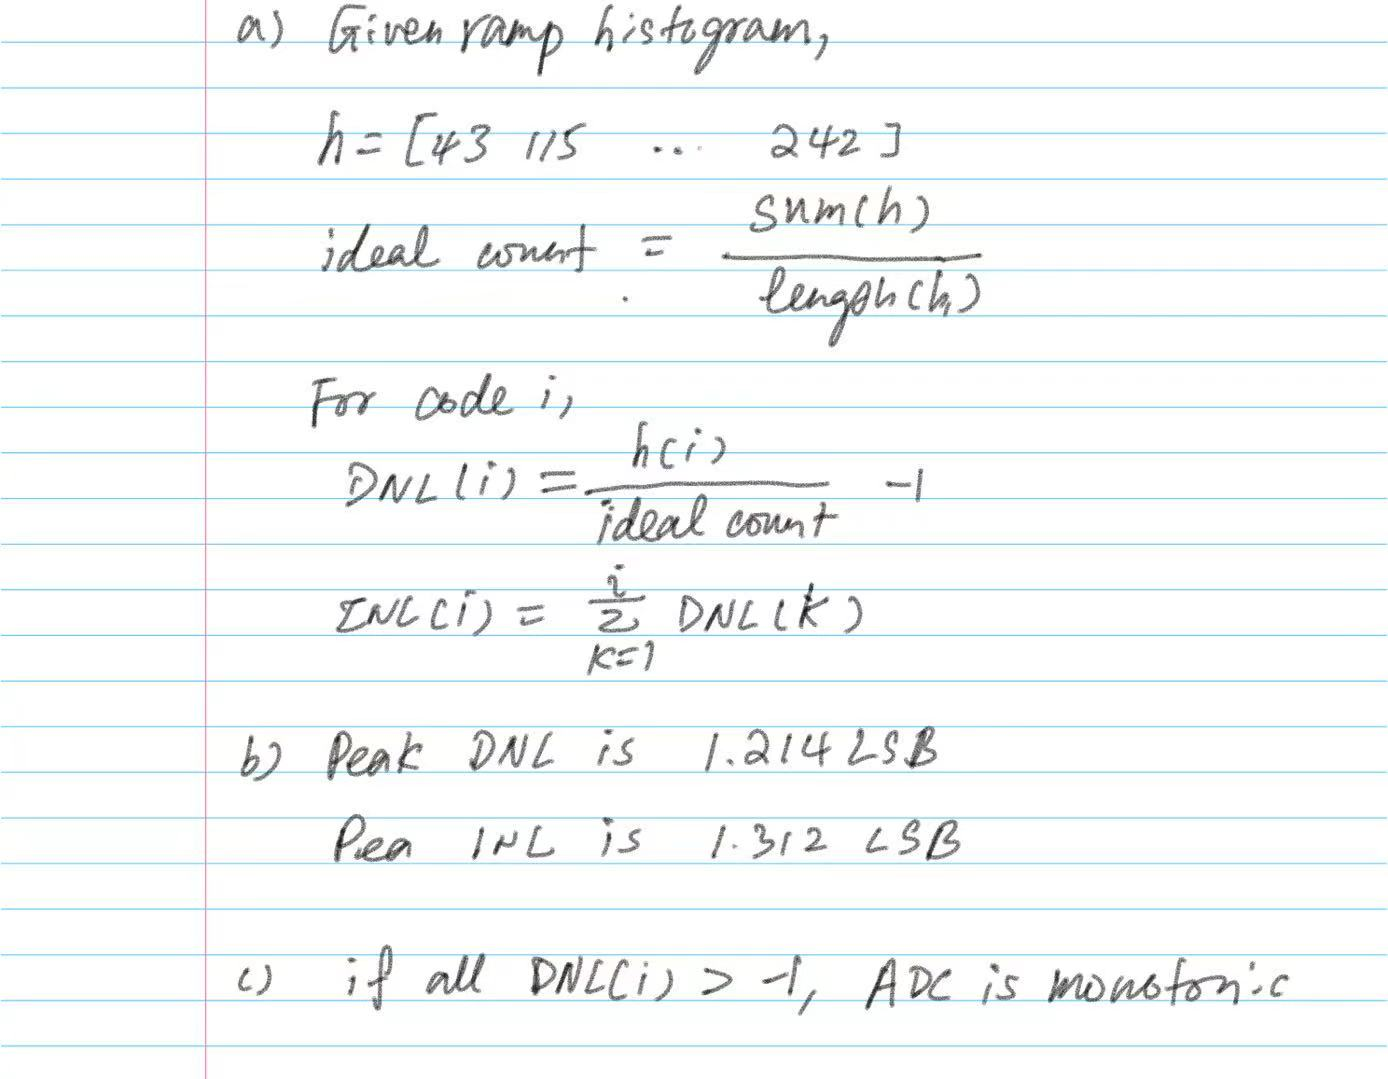

Peak DNL: 1.214 LSB
Peak INL: 1.312 LSB
ADC is monotonic.


/tmp/ipykernel_14359/2911373464.py:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(dnl, use_line_collection=True)
/tmp/ipykernel_14359/2911373464.py:37: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(inl, use_line_collection=True)


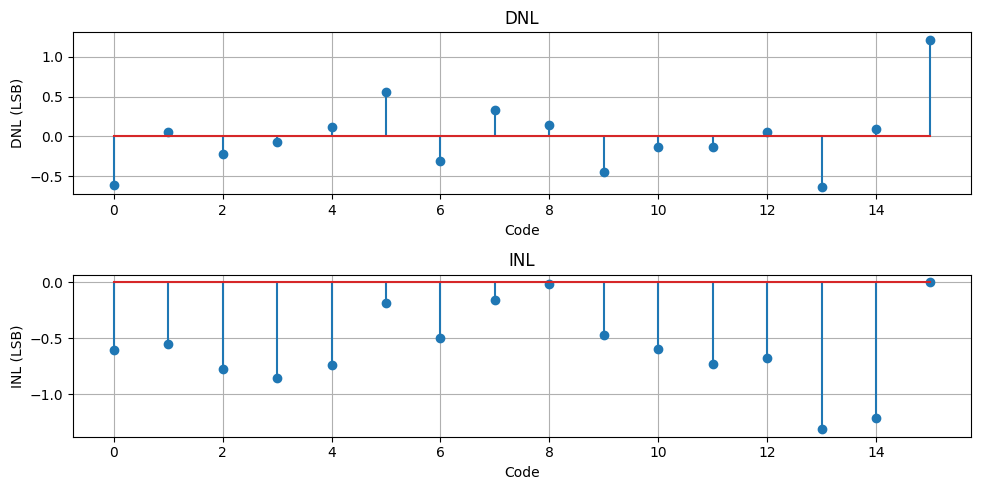

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

hist = np.array([43, 115, 85, 101, 122, 170, 75, 146, 125, 60, 95, 95, 115, 40, 120, 242])
num_codes = len(hist)
total_samples = np.sum(hist)
ideal_count = total_samples / num_codes

dnl = (hist / ideal_count) - 1
# INL is cumulative sum of DNL in ADC
inl = np.cumsum(dnl)

peak_dnl = np.max(np.abs(dnl))
peak_inl = np.max(np.abs(inl))

is_monotonic = np.all(dnl > -1)

print(f"Peak DNL: {peak_dnl:.3f} LSB")
print(f"Peak INL: {peak_inl:.3f} LSB")
print("ADC is monotonic." if is_monotonic else "ADC is NOT monotonic.")

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.stem(dnl, use_line_collection=True)
plt.title("DNL")
plt.xlabel("Code")
plt.ylabel("DNL (LSB)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(inl, use_line_collection=True)
plt.title("INL")
plt.xlabel("Code")
plt.ylabel("INL (LSB)")
plt.grid(True)

plt.tight_layout()
plt.show()


5. The end point DNL for a 3-bit ADC is measured to be:
DNL: 0 -0.5 0 +0.5 -1 +0.5 +0.5 0 (all numbers in terms of LSB)
The ADC exhibits offset and full-scale error:
Offset error = +0.5LSB
Full scale error = +0.5LSB
a) Find the INL for this ADC
b) Draw the transfer curve of this ADC.

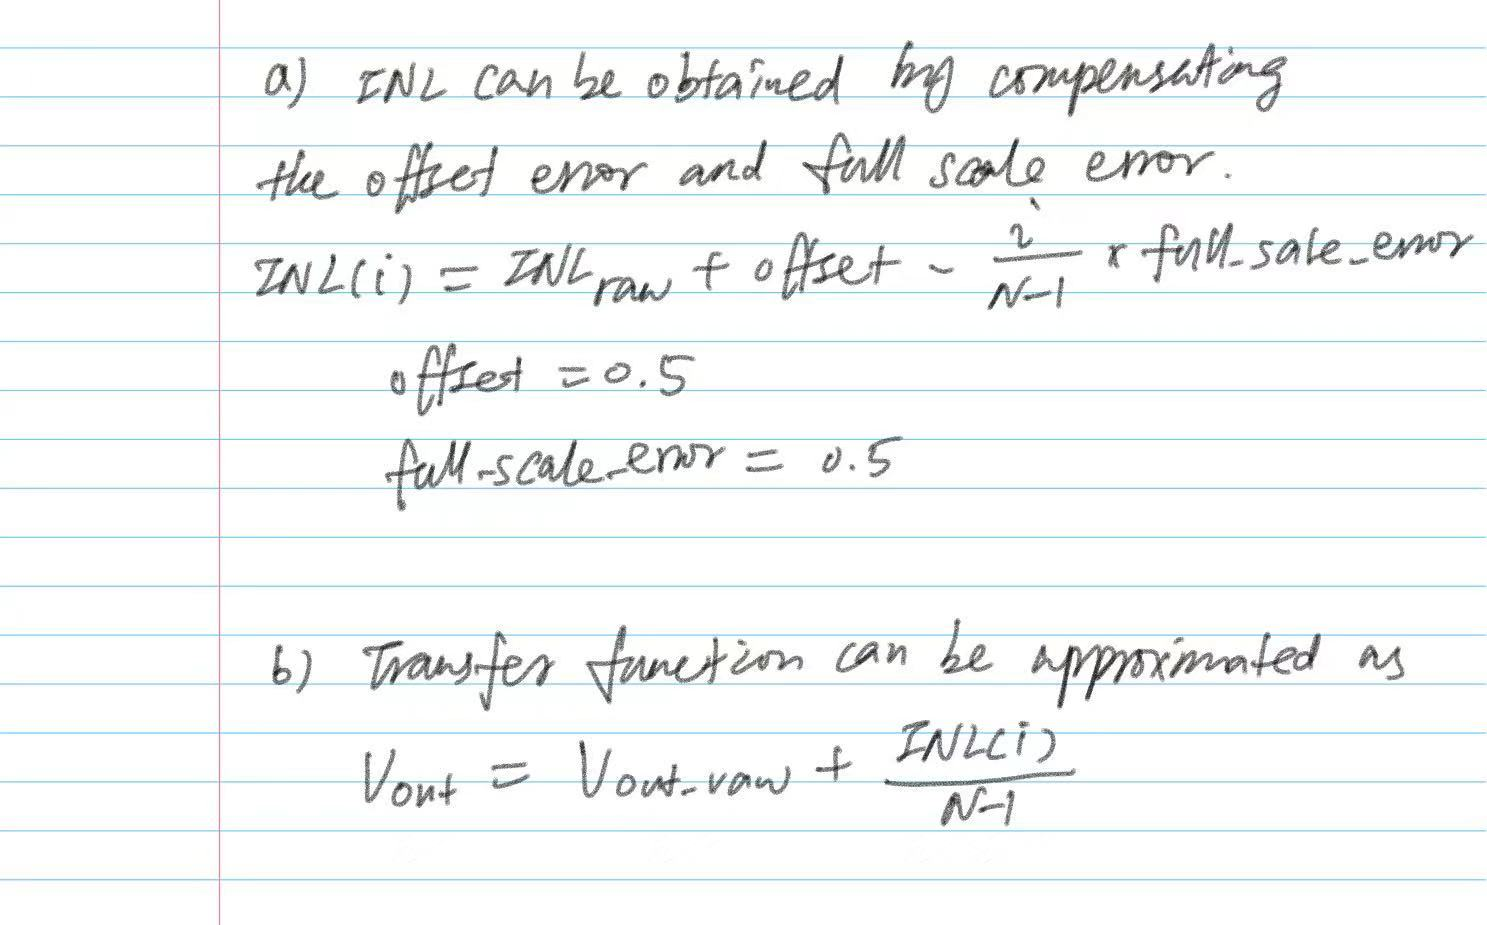

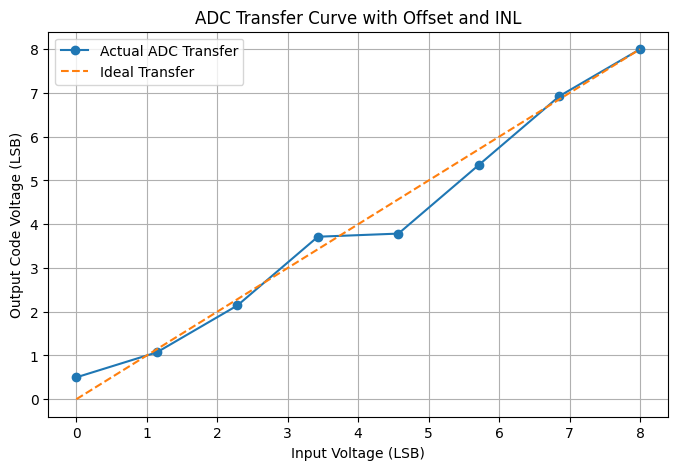

In [8]:
import numpy as np
import matplotlib.pyplot as plt

dnl = np.array([0, -0.5, 0, 0.5, -1, 0.5, 0.5, 0])
offset_error = 0.5
fs_error = 0.5
N = len(dnl)

inl_raw = np.cumsum(dnl)
inl_corrected = inl_raw + offset_error - np.linspace(0, fs_error, N)

# in unit of LSB
ideal = np.linspace(0, N, N)
real = ideal + inl_corrected

plt.figure(figsize=(8, 5))
plt.plot(ideal, real, marker='o', label='Actual ADC Transfer')
plt.plot(ideal, ideal, '--', label='Ideal Transfer')
plt.title("ADC Transfer Curve with Offset and INL")
plt.xlabel("Input Voltage (LSB)")
plt.ylabel("Output Code Voltage (LSB)")
plt.grid(True)
plt.legend()
plt.show()


6. A tone at frequency Fc is sampled at frequency Fs and quantized with N bits. The resulting quantization noise is white (flat in frequency, see the figure).

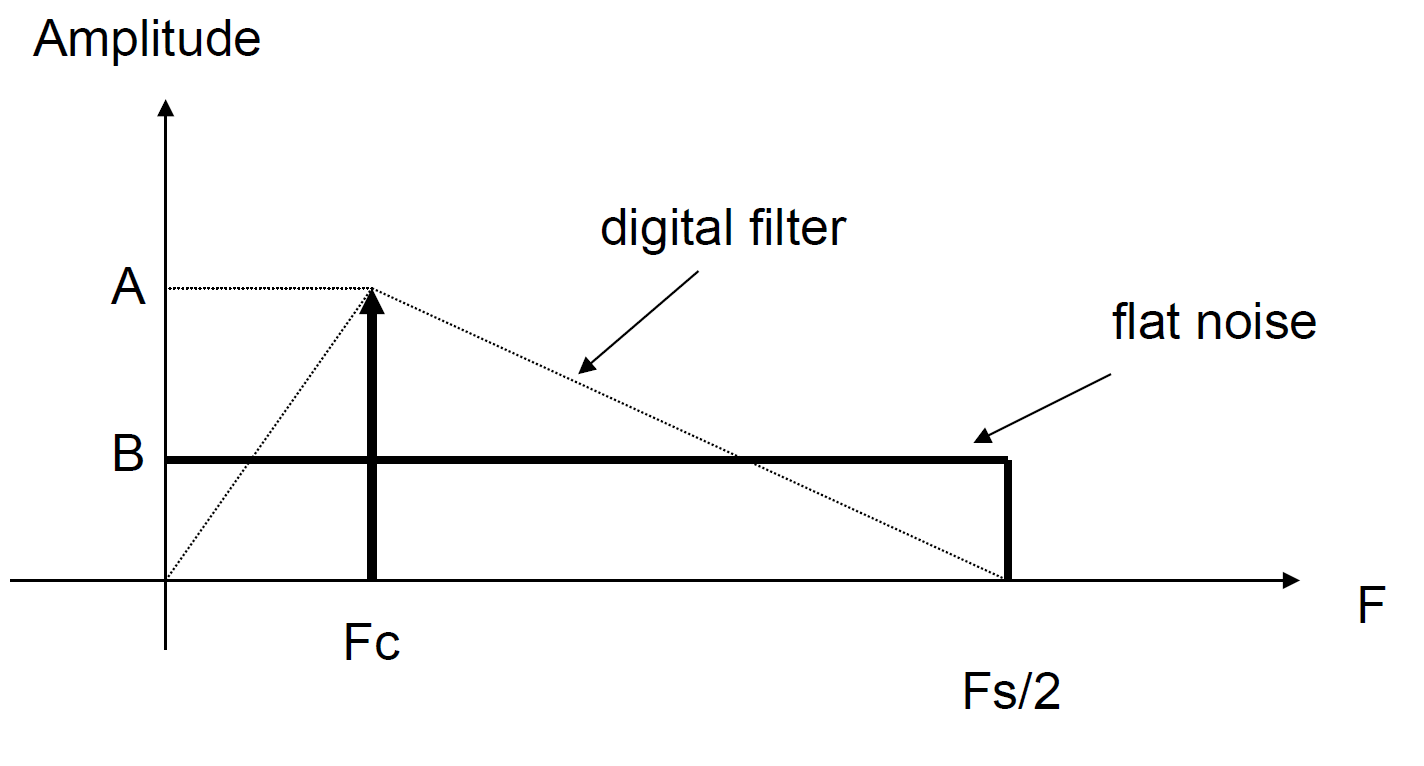

a. (5%) What is the peak (full scale) signal to quantization noise ratio SQNR(dB)?
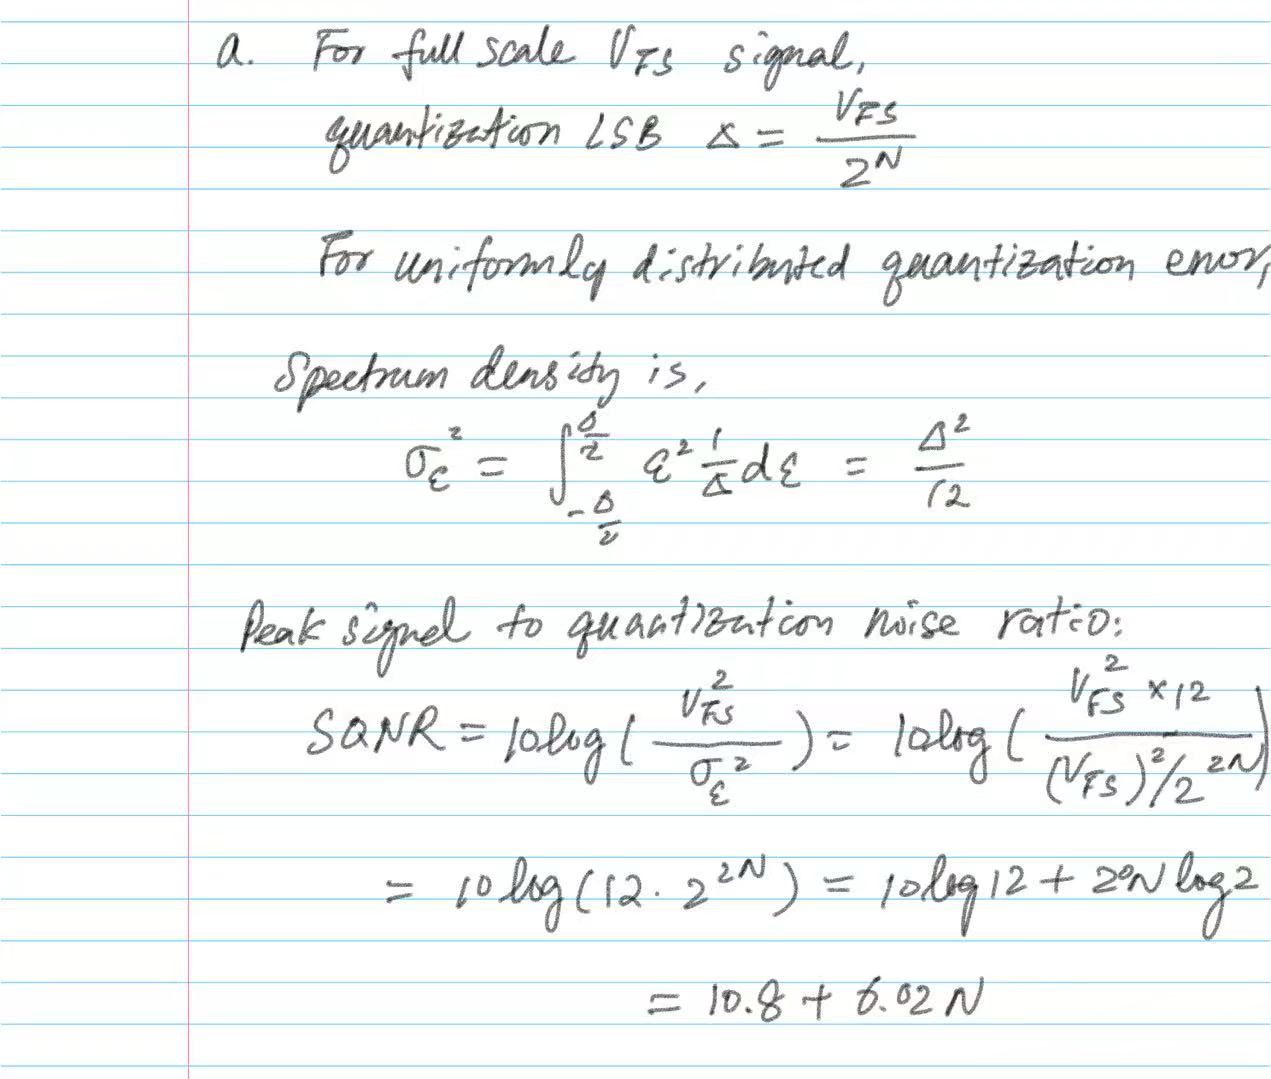

b. (25%) Assume that an L point DFT of the sampled tone is calculated and plotted in a linear scale. Assume that resultant noise floor is perfectly flat. From the range [0 π] of the DFT plot, the linear SNQR is calculated as the power of the sinewave frequency bin divided by the power of all the other bins. What is the height difference in dB between the sinewave frequency bin and the noise floor?
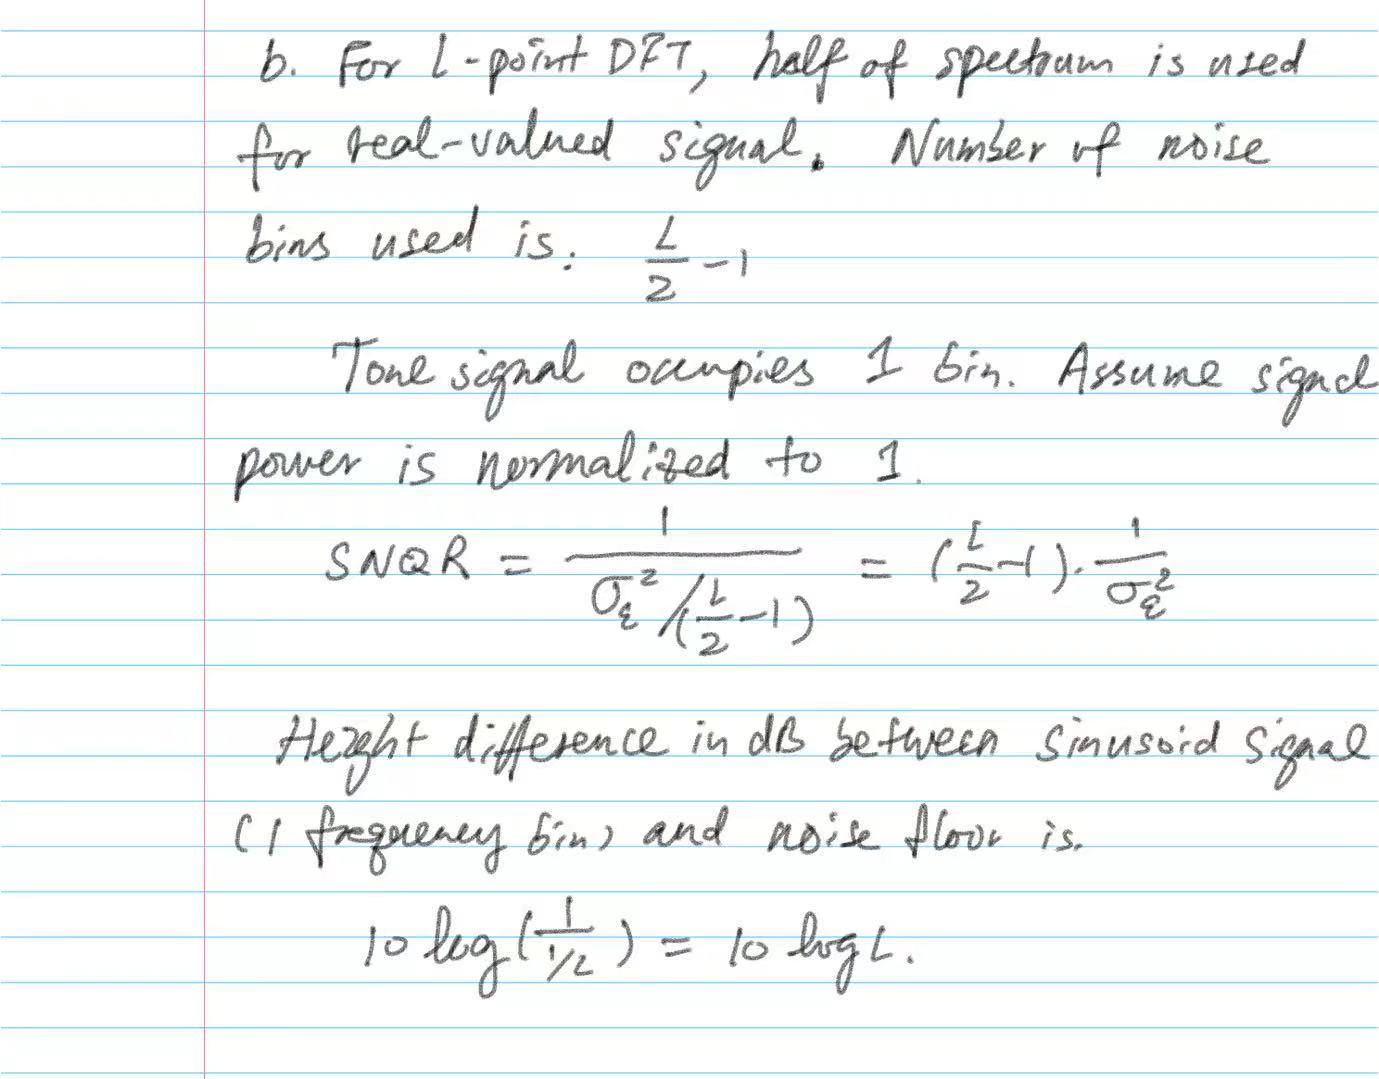

c. (5%) What are necessary conditions in the previous problem for the DFT noise to be flat? Are these conditions sufficient for the noise to be completely flat?
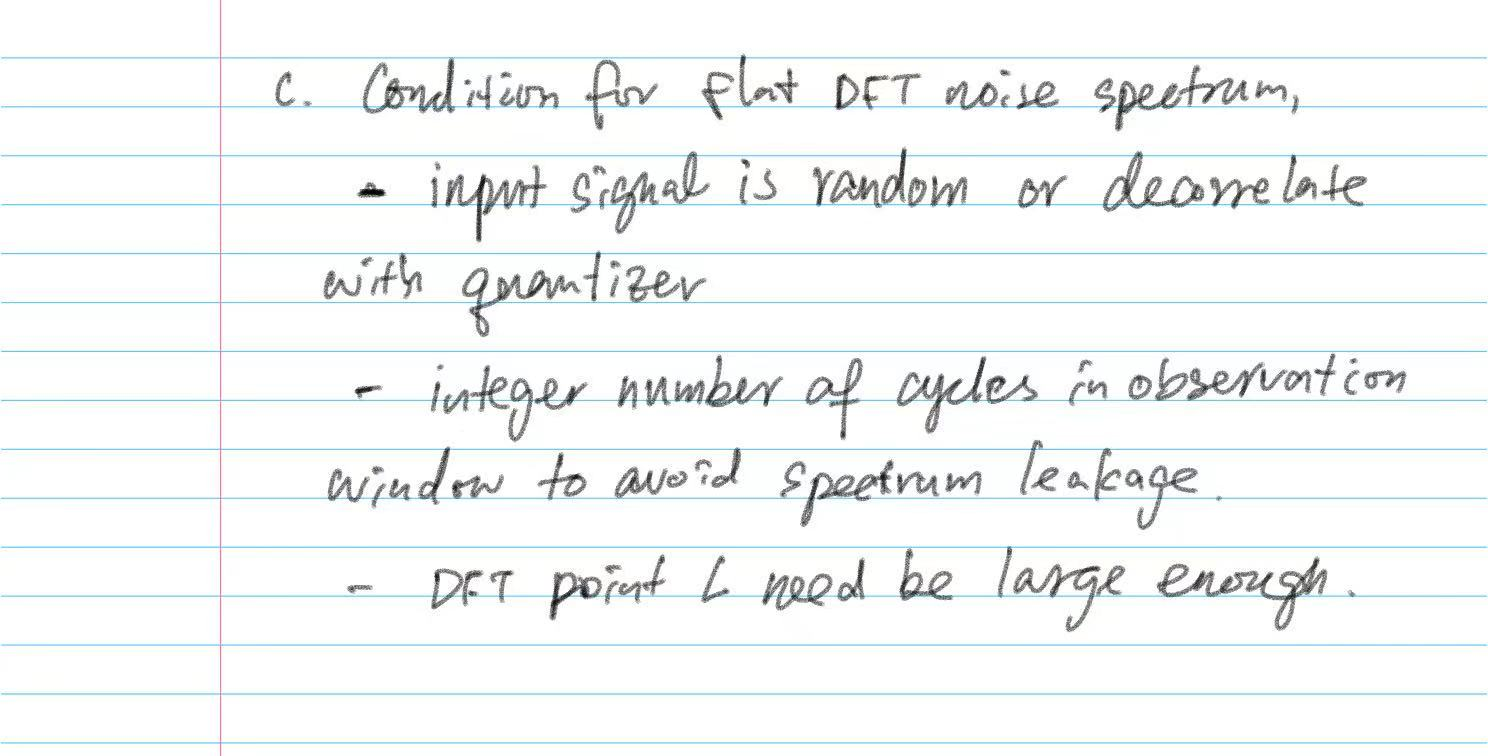

d. (25%) The digital filter shown in the figure is used to filter out the signal from the quantization noise. What is the SNR at the output of the filter?
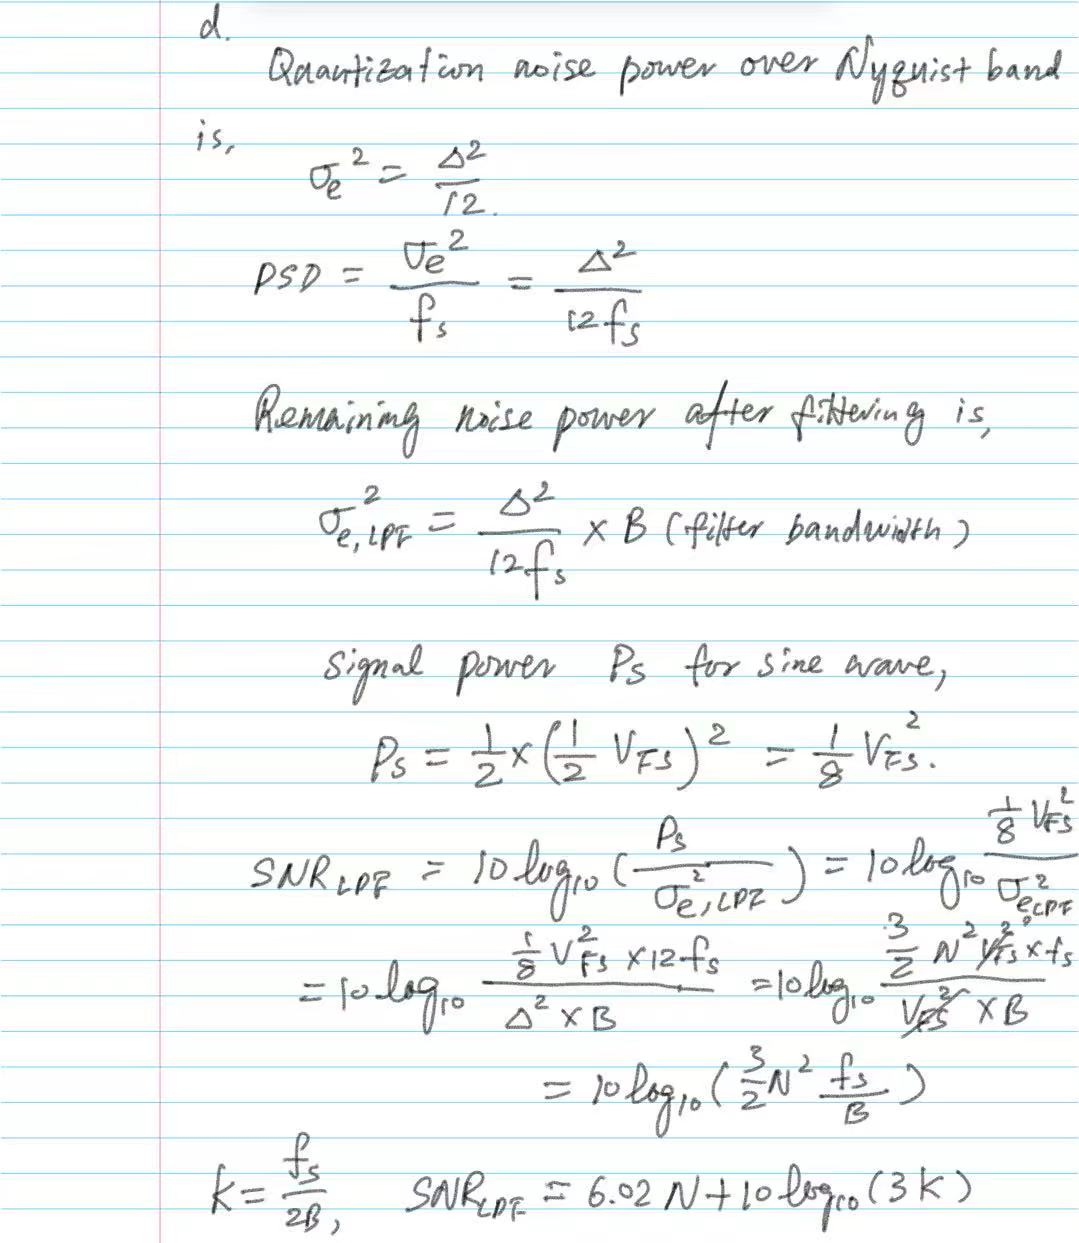

7. Consider the preamplifier/latch topology below.

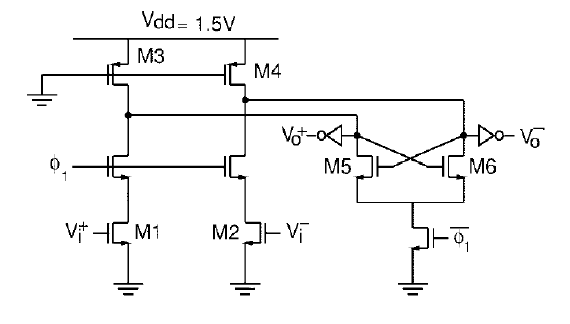

(a) Please explain the circuit dynamics for Φ1 and ~Φ1. Clearly indicate the region of operation of the transistors (i.e., OFF, triode, saturation)
(b) Find an expression of the input vs the output that takes into account the gains and the positive regeneration of the circuit.
(c) Explain the advantages and disadvantages between dynamic and static latches?
(d) Is this latch a static, dynamic or a semi-dynamic latch? Why?

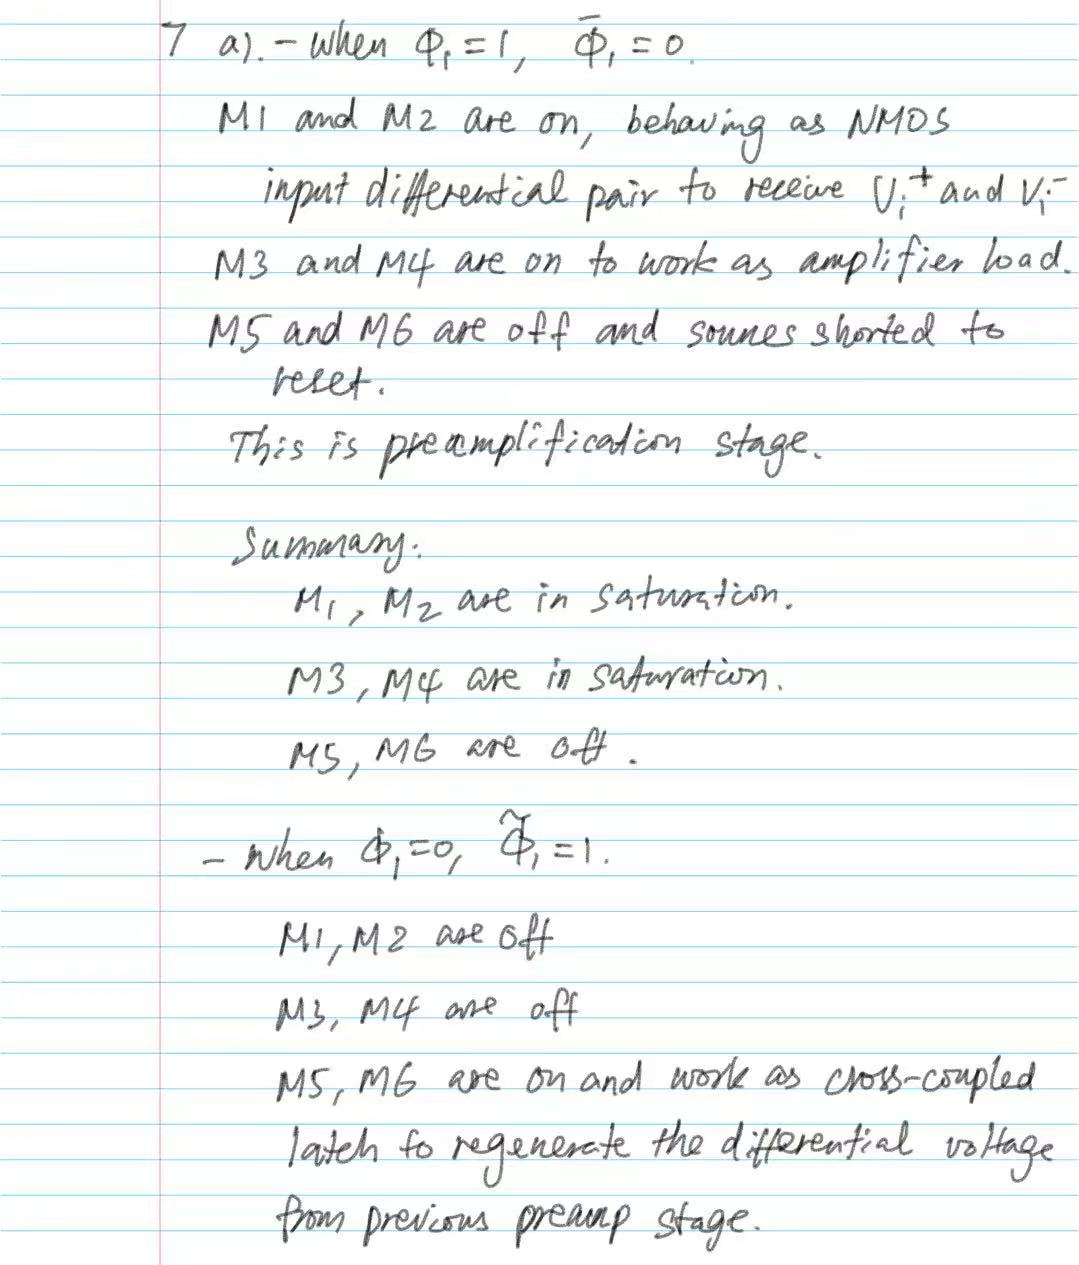
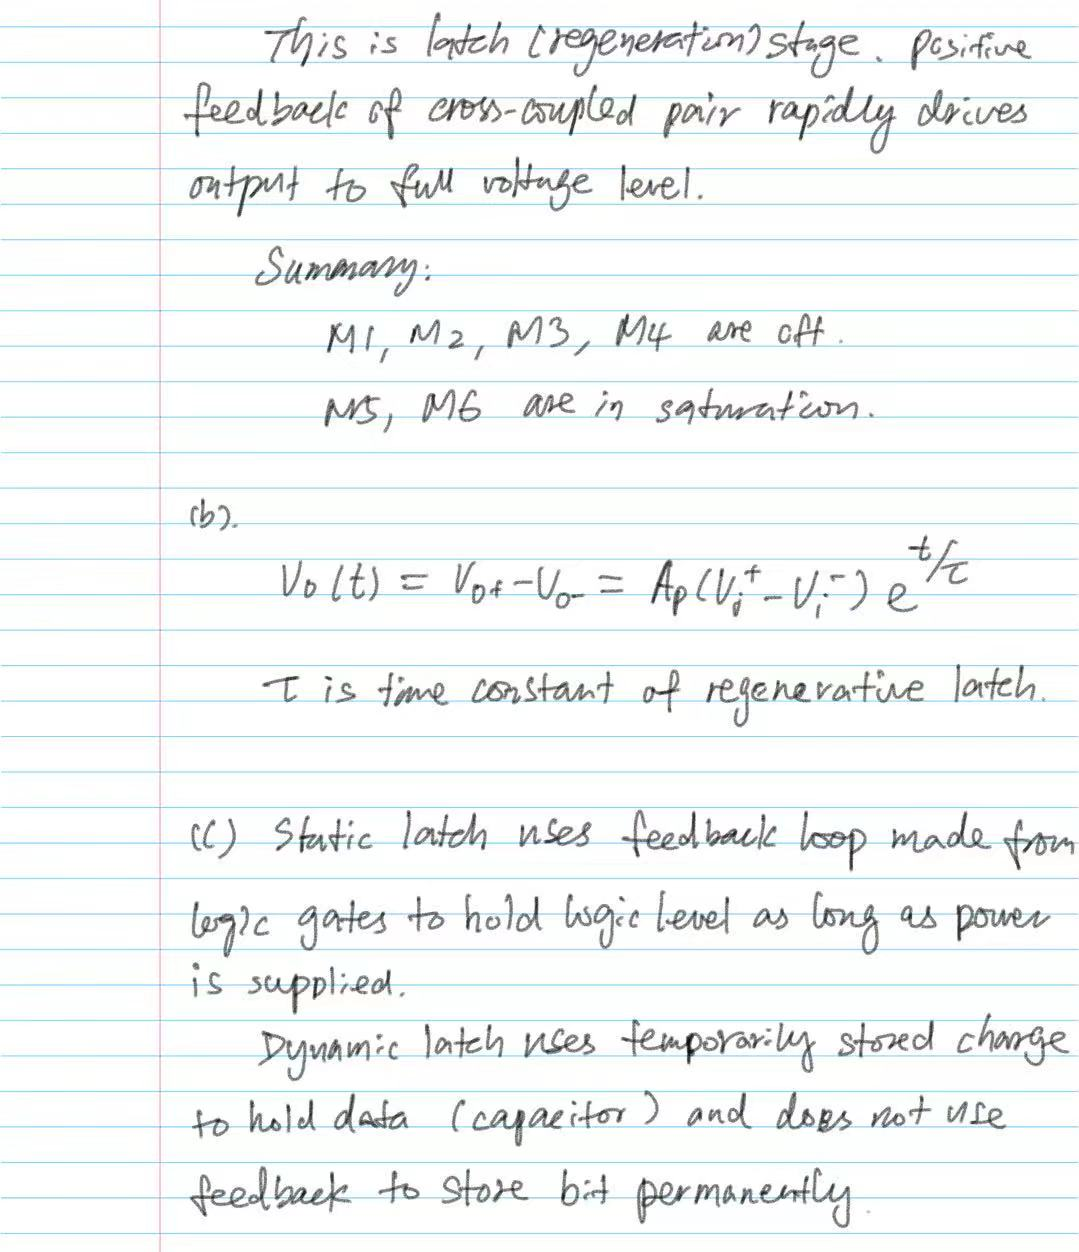
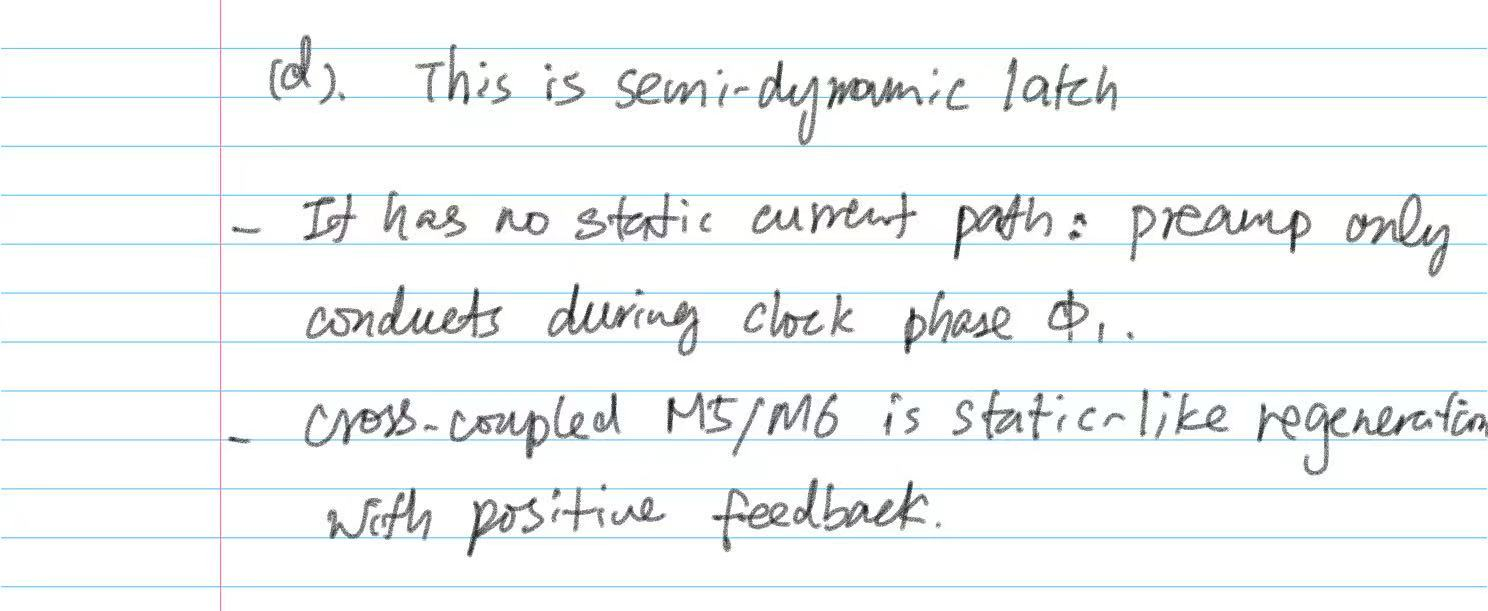